In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file1 = "colocate1_new.txt"
file2 = "colocate2_new.txt"

sensor1 = pd.read_csv(file1, header=None )
sensor2 = pd.read_csv(file2, header=None)


In [3]:
#sensor1

In [4]:
sensor1 = sensor1.iloc[8000:,:]
sensor2 = sensor2.iloc[8026:,:]
sensor1.columns=['time','violet' ,'blue', 'green', 'yellow', 'orange', 'red']
sensor2.columns=['time','violet' ,'blue', 'green', 'yellow', 'orange', 'red']


sensor1['newtime'] = pd.to_datetime(sensor1['time'])
sensor1 = sensor1.resample('1T',on='newtime').mean()
sensor1 = sensor1.iloc[5:,:]
sensor1 = sensor1.interpolate()

sensor2['newtime'] = pd.to_datetime(sensor2['time'])
sensor2 = sensor2.resample('1T',on='newtime').mean()
sensor2 = sensor2.interpolate()

### outliers calculation

In [5]:
from numpy import mean
from numpy import std
data_diff = sensor2['blue']-sensor1['blue']
data_mean, data_std = mean(data_diff),std(data_diff)
# outliers considered as 2 std above or below the mean
cut_off = data_std*2
lower, upper = data_mean - cut_off, data_mean + cut_off

sensor1['diff'] = data_diff
sensor1['outliers'] = (sensor1['diff']<lower)|(sensor1['diff']>upper)

In [6]:
sensor1.index[sensor1['outliers']].values

array(['2019-11-25T13:15:00.000000000', '2019-11-25T13:16:00.000000000',
       '2019-11-25T13:17:00.000000000', '2019-11-25T13:18:00.000000000',
       '2019-11-25T13:19:00.000000000', '2019-11-25T13:20:00.000000000',
       '2019-11-25T13:21:00.000000000', '2019-11-25T13:22:00.000000000',
       '2019-11-25T13:23:00.000000000', '2019-11-25T13:24:00.000000000',
       '2019-11-25T13:26:00.000000000', '2019-11-25T13:27:00.000000000',
       '2019-11-25T13:28:00.000000000', '2019-11-25T13:29:00.000000000',
       '2019-11-25T13:30:00.000000000', '2019-11-25T13:32:00.000000000',
       '2019-11-25T13:34:00.000000000', '2019-11-25T13:35:00.000000000',
       '2019-11-25T13:36:00.000000000', '2019-11-25T13:40:00.000000000',
       '2019-11-25T13:41:00.000000000', '2019-11-25T13:42:00.000000000',
       '2019-11-25T13:43:00.000000000', '2019-11-25T13:44:00.000000000',
       '2019-11-25T13:45:00.000000000', '2019-11-25T13:46:00.000000000',
       '2019-11-25T13:49:00.000000000', '2019-11-25

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


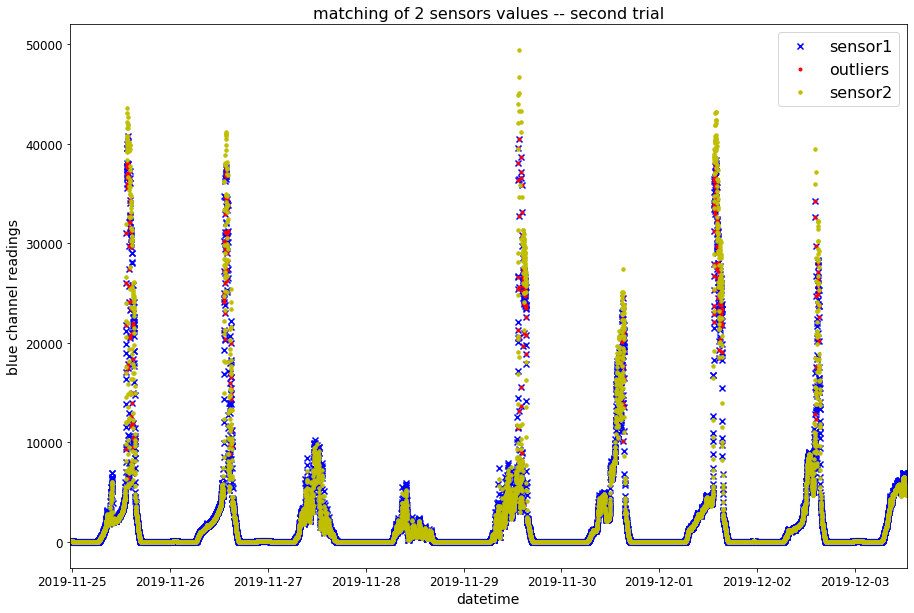

In [7]:
fig= plt.figure(figsize=(15,10))
plt.scatter(sensor1.index.values,sensor1['blue'], c='b', marker='x', label='sensor1')
plt.scatter(sensor1.index[sensor1['outliers']].values,sensor1[sensor1['outliers']]['blue'], c='r', marker='.', label='outliers')
plt.scatter(sensor2.index.values,sensor2['blue'], c='y', marker='o', label='sensor2',s=12)
plt.legend(loc='upper left')
plt.xlim(sensor1.index[0],sensor1.index[-1])
#plt.title('winter colocate data', fontsize = 16)
plt.legend(fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('matching of 2 sensors values -- second trial',fontsize=16)
plt.xlabel('datetime',fontsize=14)
plt.ylabel('blue channel readings',fontsize=14)
#plt.xticks('time')
plt.show()

Text(0.5, 1.0, 'colocated sensor data validation')

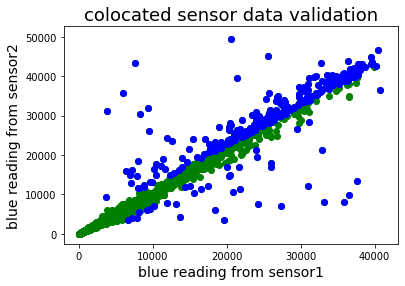

In [21]:
x = sensor1['blue']
y = sensor2['blue']
ax = plt.scatter(x=x, y=y, color="g")
plt.scatter(sensor1[sensor1['outliers']]['blue'],sensor2[sensor1['outliers']]['blue'],color='b')
plt.xlabel('blue reading from sensor1',fontsize=14)
plt.ylabel('blue reading from sensor2',fontsize=14)
plt.title('colocated sensor data validation',fontsize=18)

In [20]:
sensor1[sensor1['outliers']]['blue'].size,
sensor2[sensor1['outliers']]['blue'].size

332

In [9]:
# check outlier 


In [10]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

regr.fit(np.array(sensor1['blue']).reshape(-1,1),np.array(sensor2['blue']).reshape(-1,1))
print(regr.coef_[0])
print(regr.intercept_)

[1.07235984]
[-94.84956434]


In [11]:
ax.get_lines()[0].get_xdata()/ax.get_lines()[0].get_ydata()

array([0.8937204 , 0.8832202 , 0.86492878, 0.82505961, 0.67052435,
       1.53065205, 1.07217638, 1.01157874, 0.98765577, 0.97484786,
       0.96686893, 0.96142115, 0.95746497, 0.95446155, 0.95210371,
       0.9502035 , 0.94863948, 0.94732967, 0.94621675, 0.94525944,
       0.94442723, 0.94369711, 0.94305137, 0.94247618, 0.94196058,
       0.94149577, 0.9410746 , 0.94069119, 0.94034068, 0.94001902,
       0.93972278, 0.93944906, 0.9391954 , 0.93895966, 0.93874   ,
       0.93853485, 0.9383428 , 0.93816264, 0.93799329, 0.93783383,
       0.93768339, 0.93754125, 0.93740672, 0.93727922, 0.9371582 ,
       0.93704319, 0.93693375, 0.93682949, 0.93673004, 0.93663507,
       0.9365443 , 0.93645746, 0.93637428, 0.93629455, 0.93621805,
       0.93614459, 0.936074  , 0.9360061 , 0.93594075, 0.93587781,
       0.93581715, 0.93575864, 0.93570217, 0.93564764, 0.93559495,
       0.93554401, 0.93549472, 0.93544702, 0.93540083, 0.93535608,
       0.93531269, 0.93527061, 0.93522979, 0.93519016, 0.93515

In [12]:
from sklearn.metrics import r2_score
r2_score(x, y), sensor1['blue'].corr(sensor2['blue'])


(0.9513912058930211, 0.9817161421814283)

In [13]:
r2_score(sensor1['yellow'], sensor2['yellow'])

0.9615486330420391

In [14]:
sensor1

,violet,blue,green,yellow,orange,red,diff,outliers
newtime,,,,,,,,
2019-11-24 23:26:00,23.158543,21.484222,95.990005,63.464298,177.938187,35.382439,3.515993,False
2019-11-24 23:27:00,23.158543,21.484222,95.990005,62.502720,177.938187,35.382439,2.265982,False
2019-11-24 23:28:00,23.158543,21.484222,95.990005,62.502720,177.938187,35.382439,3.515993,False
2019-11-24 23:29:00,23.158543,21.484222,95.990005,62.502720,177.938187,35.382439,3.515993,False
2019-11-24 23:30:00,23.158543,21.484222,95.990005,62.502720,177.938187,35.382439,3.515993,False
...,...,...,...,...,...,...,...,...
2019-12-03 12:37:00,2839.237305,5532.818848,10760.586914,8023.425781,3287.988037,1968.780029,-395.274902,False
2019-12-03 12:38:00,2850.816650,5483.531738,10721.759766,7935.921875,3294.757568,1982.259155,-384.737793,False
2019-12-03 12:39:00,2892.501953,5611.173340,10979.531250,8156.124023,3349.879639,2007.532227,-407.378906,False


In [15]:
sensor2

,violet,blue,green,yellow,orange,red
newtime,,,,,,
2019-11-24 23:26:00,22.373077,25.000216,74.443863,59.576042,102.625221,38.414967
2019-11-24 23:27:00,22.373077,23.750204,74.443863,59.576042,102.625221,38.414967
2019-11-24 23:28:00,22.373077,25.000216,74.443863,59.576042,102.625221,38.414967
2019-11-24 23:29:00,22.373077,25.000216,74.443863,59.576042,102.625221,38.414967
2019-11-24 23:30:00,22.373077,25.000216,75.522758,59.576042,102.625221,38.414967
...,...,...,...,...,...,...
2019-12-03 12:37:00,2792.906006,5137.543945,10409.193359,7384.499512,2987.534180,1883.206421
2019-12-03 12:38:00,2800.363525,5098.793945,10320.724609,7284.880371,2991.335205,1891.937134
2019-12-03 12:39:00,2841.380859,5203.794434,10598.000977,7485.094727,3043.597900,1919.875244
